# Train script for Advanced RNN VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../../Modules")
sys.path.append("../../Datasets")

# local imports
from train import train
from helpers import kl_loss,nll_loss,mse_loss,kl_loss_multi
from models import AdvancedRNNVAE
from ToyDatasets.timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 32
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = AdvancedRNNVAE(input_size=1,rnn_size=256,latent_size=64,output_size=num_classes,use_softmax=True,bidirectional=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1])
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 878218
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=5)

## Define trainer


Train (1 2%) elbo: -1.7110 r_loss: -1.7110 kl: 158.5639 aux_loss: 0.0000 beta 0.00e+00
Valid (1 2%) elbo: -1.1196 r_loss: -1.1196 kl: 380.3193 aux_loss: 0.0000 beta 0.00e+00

Train (2 4%) elbo: -0.9820 r_loss: -0.8997 kl: 403.4111 aux_loss: 0.0000 beta 2.04e-04
Valid (2 4%) elbo: -0.8088 r_loss: -0.7227 kl: 421.8980 aux_loss: 0.0000 beta 2.04e-04

Train (3 6%) elbo: -0.7587 r_loss: -0.6159 kl: 349.9222 aux_loss: 0.0000 beta 4.08e-04
Valid (3 6%) elbo: -0.6498 r_loss: -0.5142 kl: 332.2853 aux_loss: 0.0000 beta 4.08e-04

Train (4 8%) elbo: -0.6721 r_loss: -0.4915 kl: 294.9413 aux_loss: 0.0000 beta 6.12e-04
Valid (4 8%) elbo: -0.6186 r_loss: -0.4419 kl: 288.6174 aux_loss: 0.0000 beta 6.12e-04

Train (5 10%) elbo: -0.6299 r_loss: -0.4166 kl: 261.3280 aux_loss: 0.0000 beta 8.16e-04
Valid (5 10%) elbo: -0.6083 r_loss: -0.4037 kl: 250.6891 aux_loss: 0.0000 beta 8.16e-04

Train (6 12%) elbo: -0.6088 r_loss: -0.3664 kl: 237.5409 aux_loss: 0.0000 beta 1.02e-03
Valid (6 12%) elbo: -0.6078 r_loss


Train (47 94%) elbo: -1.0633 r_loss: -0.4893 kl: 61.1460 aux_loss: 0.0000 beta 9.39e-03
Valid (47 94%) elbo: -1.1284 r_loss: -0.5488 kl: 61.7450 aux_loss: 0.0000 beta 9.39e-03

Train (48 96%) elbo: -1.0726 r_loss: -0.4925 kl: 60.4771 aux_loss: 0.0000 beta 9.59e-03
Valid (48 96%) elbo: -1.0756 r_loss: -0.5071 kl: 59.2685 aux_loss: 0.0000 beta 9.59e-03

Train (49 98%) elbo: -1.0731 r_loss: -0.4911 kl: 59.4214 aux_loss: 0.0000 beta 9.80e-03
Valid (49 98%) elbo: -1.0996 r_loss: -0.5274 kl: 58.4187 aux_loss: 0.0000 beta 9.80e-03

Train (50 100%) elbo: -1.0841 r_loss: -0.5027 kl: 58.1432 aux_loss: 0.0000 beta 1.00e-02
Valid (50 100%) elbo: -1.0100 r_loss: -0.4392 kl: 57.0785 aux_loss: 0.0000 beta 1.00e-02


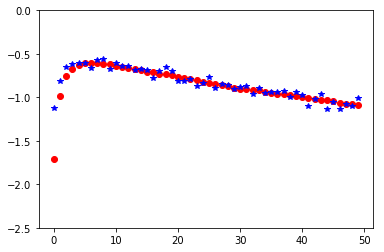

In [5]:
# use at least 50 iterations to get good results
train(data_loader,valid_data_loader,model,optimizer,scheduler,loss_fn=nll_loss,kl_loss_fn=kl_loss_multi,n_iters=50,use_softmax=True,max_beta=1e-2,print_every=1,plot_pred=False)

In [6]:
#torch.save(model.state_dict(),"../../Saved_models/ToyDataset/RNNVAE_nll_map.pt")